## Реальные/фейковые объявления о работе

In [154]:
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
import warnings
warnings.filterwarnings('ignore')
#Handling text
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [155]:
data=pd.read_csv('/content/fake_job_postings.csv')
data.head(10)

job_id                                      title               location  \
0       1                           Marketing Intern       US, NY, New York   
1       2  Customer Service - Cloud Video Production         NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3       4          Account Executive - Washington DC     US, DC, Washington   
4       5                        Bill Review Manager     US, FL, Fort Worth   
5       6                           Accounting Clerk               US, MD,    
6       7                      Head of Content (m/f)         DE, BE, Berlin   
7       8           Lead Guest Service Specialist     US, CA, San Francisco   
8       9                                 HP BSM SME      US, FL, Pensacola   
9      10    Customer Service Associate - Part Time         US, AZ, Phoenix   

   department salary_range                                    company_profile  \
0   Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1     Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2         NaN          NaN  Valor Services provides Workforce Solutions th...   
3       Sales          NaN  Our passion for improving quality of life thro...   
4         NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   
5         NaN          NaN                                                NaN   
6  ANDROIDPIT  20000-28000  Founded in 2009, the Fonpit AG rose with its i...   
7         NaN          NaN  Airenvy’s mission is to provide lucrative yet ...   
8         NaN          NaN  Solutions3 is a woman-owned small business who...   
9         NaN          NaN  Novitex Enterprise Solutions, formerly Pitney ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   
5  Job OverviewApex is an environmental consultin...   
6  Your Responsibilities: Manage the English-spea...   
7  Who is Airenvy?Hey there! We are seasoned entr...   
8  Implementation/Configuration/Testing/Training ...   
9  The Customer Service Associate will be based i...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   
5                                                NaN   
6  Your Know-How:                                ...   
7  Experience with CRM software, live chat, and p...   
8  MUST BE A US CITIZEN.An active TS/SCI clearanc...   
9  Minimum Requirements:Minimum of 6 months custo...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   
5                                                NaN              0   
6  Your Benefits: Being part of a fast-growing co...              0   
7  Competitive Pay. You'll be able to eat steak e...              0   
8                                                NaN              0   
9                                                NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2  

In [156]:
data.dtypes.to_frame()

0
job_id                int64
title                object
location             object
department           object
salary_range         object
company_profile      object
description          object
requirements         object
benefits             object
telecommuting         int64
has_company_logo      int64
has_questions         int64
employment_type      object
required_experience  object
required_education   object
industry             object
function             object
fraudulent            int64

In [157]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']


In [158]:
for i in categories:
     x=data[i].value_counts()
     print (x.to_frame())

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

In [159]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

(array([5.00000e-01, 2.01500e+02, 4.02500e+02, 6.03500e+02, 8.04500e+02,
        1.00550e+03, 1.20650e+03, 1.40750e+03, 1.60850e+03, 1.80950e+03,
        2.01050e+03, 2.21150e+03, 2.41250e+03, 2.61350e+03, 2.81450e+03,
        3.01550e+03, 3.21650e+03, 3.41750e+03, 3.61850e+03, 3.81950e+03,
        4.02050e+03, 4.22150e+03, 4.42250e+03, 4.62350e+03, 4.82450e+03,
        5.02550e+03, 5.22650e+03, 5.42750e+03, 5.62850e+03, 5.82950e+03,
        6.03050e+03, 6.23150e+03, 6.43250e+03, 6.63350e+03, 6.83450e+03,
        7.03550e+03, 7.23650e+03, 7.43750e+03, 7.63850e+03, 7.83950e+03,
        8.04050e+03, 8.24150e+03, 8.44250e+03, 8.64350e+03, 8.84450e+03,
        9.04550e+03, 9.24650e+03, 9.44750e+03, 9.64850e+03, 9.84950e+03,
        1.00505e+04, 1.02515e+04, 1.04525e+04, 1.06535e+04, 1.08545e+04,
        1.10555e+04, 1.12565e+04, 1.14575e+04, 1.16585e+04, 1.18595e+04,
        1.20605e+04, 1.22615e+04, 1.24625e+04, 1.26635e+04, 1.28645e+04,
        1.30655e+04, 1.32665e+04, 1.34675e+04, 1.36

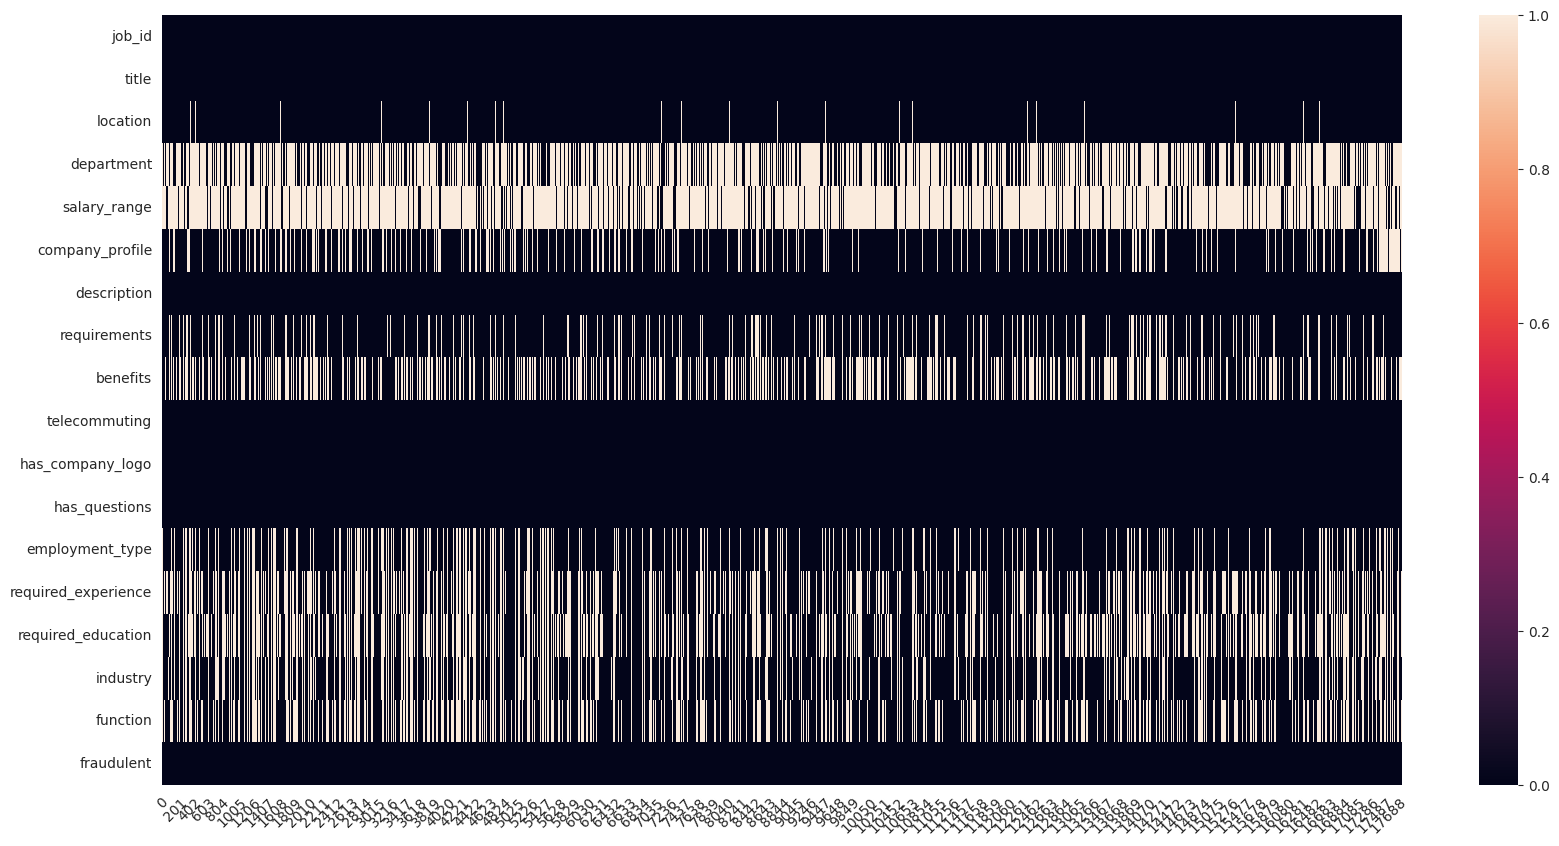

In [160]:
#хитмап пропущенных значений
plt.figure(figsize=(20,10))
sns.heatmap(data.isna().transpose())
plt.xticks(rotation=45)

In [161]:
# Заполняем пропуски
data.function.fillna(data.department,inplace=True)
#удаляем лишние столбцы
data.drop(columns=['job_id','salary_range','department'],inplace=True)

In [162]:
# Теперь заполним пропуски в категориальных признаках

text=['title','benefits','company_profile','location','description','requirements','fraudulent']
categ=['employment_type','required_experience','required_education','industry','function',
       'telecommuting','has_company_logo','has_questions','fraudulent']

In [163]:
categ_cols=data[categ].fillna('None')
categ_cols

employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
17875       Full-time    Mid-Senior level               None   
17876       Full-time    Mid-Senior level  Bachelor's Degree   
17877       Full-time                None               None   
17878        Contract      Not Applicable       Professional   
17879       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2                           None                  None              0   
3              Computer Software                 Sales              0   
4         Hospital & Health Care  Health Care Provider              0   
...                          ...                   ...            ...   
17875          Computer Software                 Sales              0   
17876                   Internet   Accounting/Auditing              0   
17877                       None                  None              0   
17878             Graphic Design                Design              0   
17879          Computer Software           Engineering              0   

       has_company_logo  has_questions  fraudulent  
0                     1              0           0  
1                     1              0           0  
2                     1              0           0  
3                     1              0           0  
4                     1              1           0  
...                 ...            ...         ...  
17875                 1              1           0  
17876                 1              1           0  
17877                 0              0           0  
17878                 0              1           0  
17879                 1              1           0  

[17880 rows x 9 columns]

In [164]:
txt_cols=data[text].fillna(' ')
txt_cols

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                                benefits  \
0                                                          
1      What you will get from usThrough being part of...   
2                                                          
3      Our culture is anything but corporate—we have ...   
4                                  Full Benefits Offered   
...                                                  ...   
17875  What can you expect from us?We have an open cu...   
17876  Health &amp; WellnessMedical planPrescription ...   
17877                                                      
17878  Competitive salary (compensation will be based...   
17879                                                      

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                      
17879  Vend is looking for some awesome new talent to...   

                   location  \
0          US, NY, New York   
1            NZ, , Auckland   
2             US, IA, Wever   
3        US, DC, Washington   
4        US, FL, Fort Worth   
...                     ...   
17875       CA, ON, Toronto   
17876  US, PA, Philadelphia   
17877       US, TX, Houston   
17878         NG, LA, Lagos   
17879     NZ, N, Wellington   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  fraudulent  
0      Experience with content management systems a m...           0  
1      What we expect from you:Your key responsibilit...           0  
2      Implement pre-commissioning and commissioning ...           0  
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...           0  
4      QUALIFICATIONS:RN license in the State of Texa...           0  
...                                                  ...         ...  
17875  To ace this role you:Will eat comprehensive St...           0  
17876  - B.A. or B.S. in Accounting- Desire to have f...           0  
17877  At least 12 years professional experience.Abil...           0  
17878  1. Must be fluent in the latest versions of Co...           0  
17879  We wan

### Получаем названия стран из местоположения
#### Всего у нас есть 91 страна

In [165]:
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

country
US    10656
GB     2384
GR      940
CA      457
DE      383
..      ...
SI        1
CO        1
SD        1
UG        1
KH        1

[91 rows x 1 columns]

## Исследуем наши данные
- ###   Одномерный анализ

In [166]:
data['fraudulent'].value_counts().to_frame()

fraudulent
0       17014
1         866

([<matplotlib.patches.Wedge at 0x7fa561fd3310>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

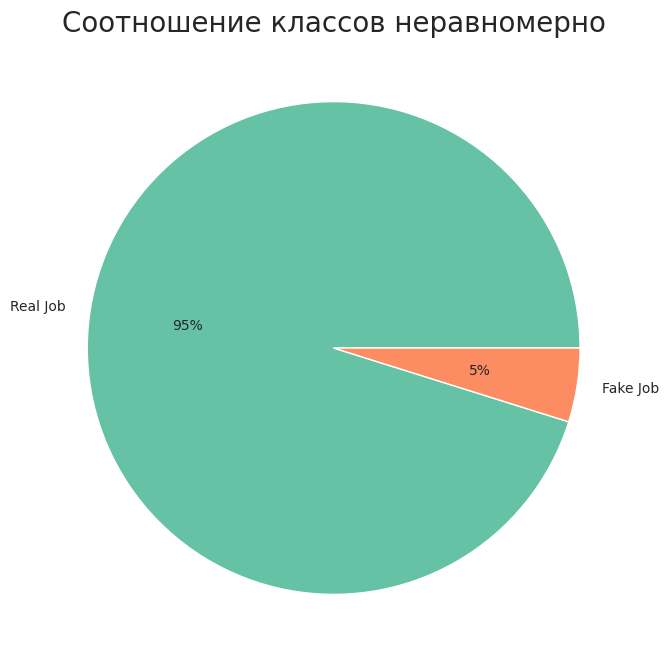

In [167]:
colors = sns.color_palette('Set2')[0:10]
labels=['Real Job','Fake Job']
plt.figure(figsize=(10,8))
plt.title('Соотношение классов неравномерно',size=20)
sns.set_style('whitegrid')
plt.pie(data['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

- ### Категориальные признаки

In [168]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

Text(0.5, 0, 'Function')

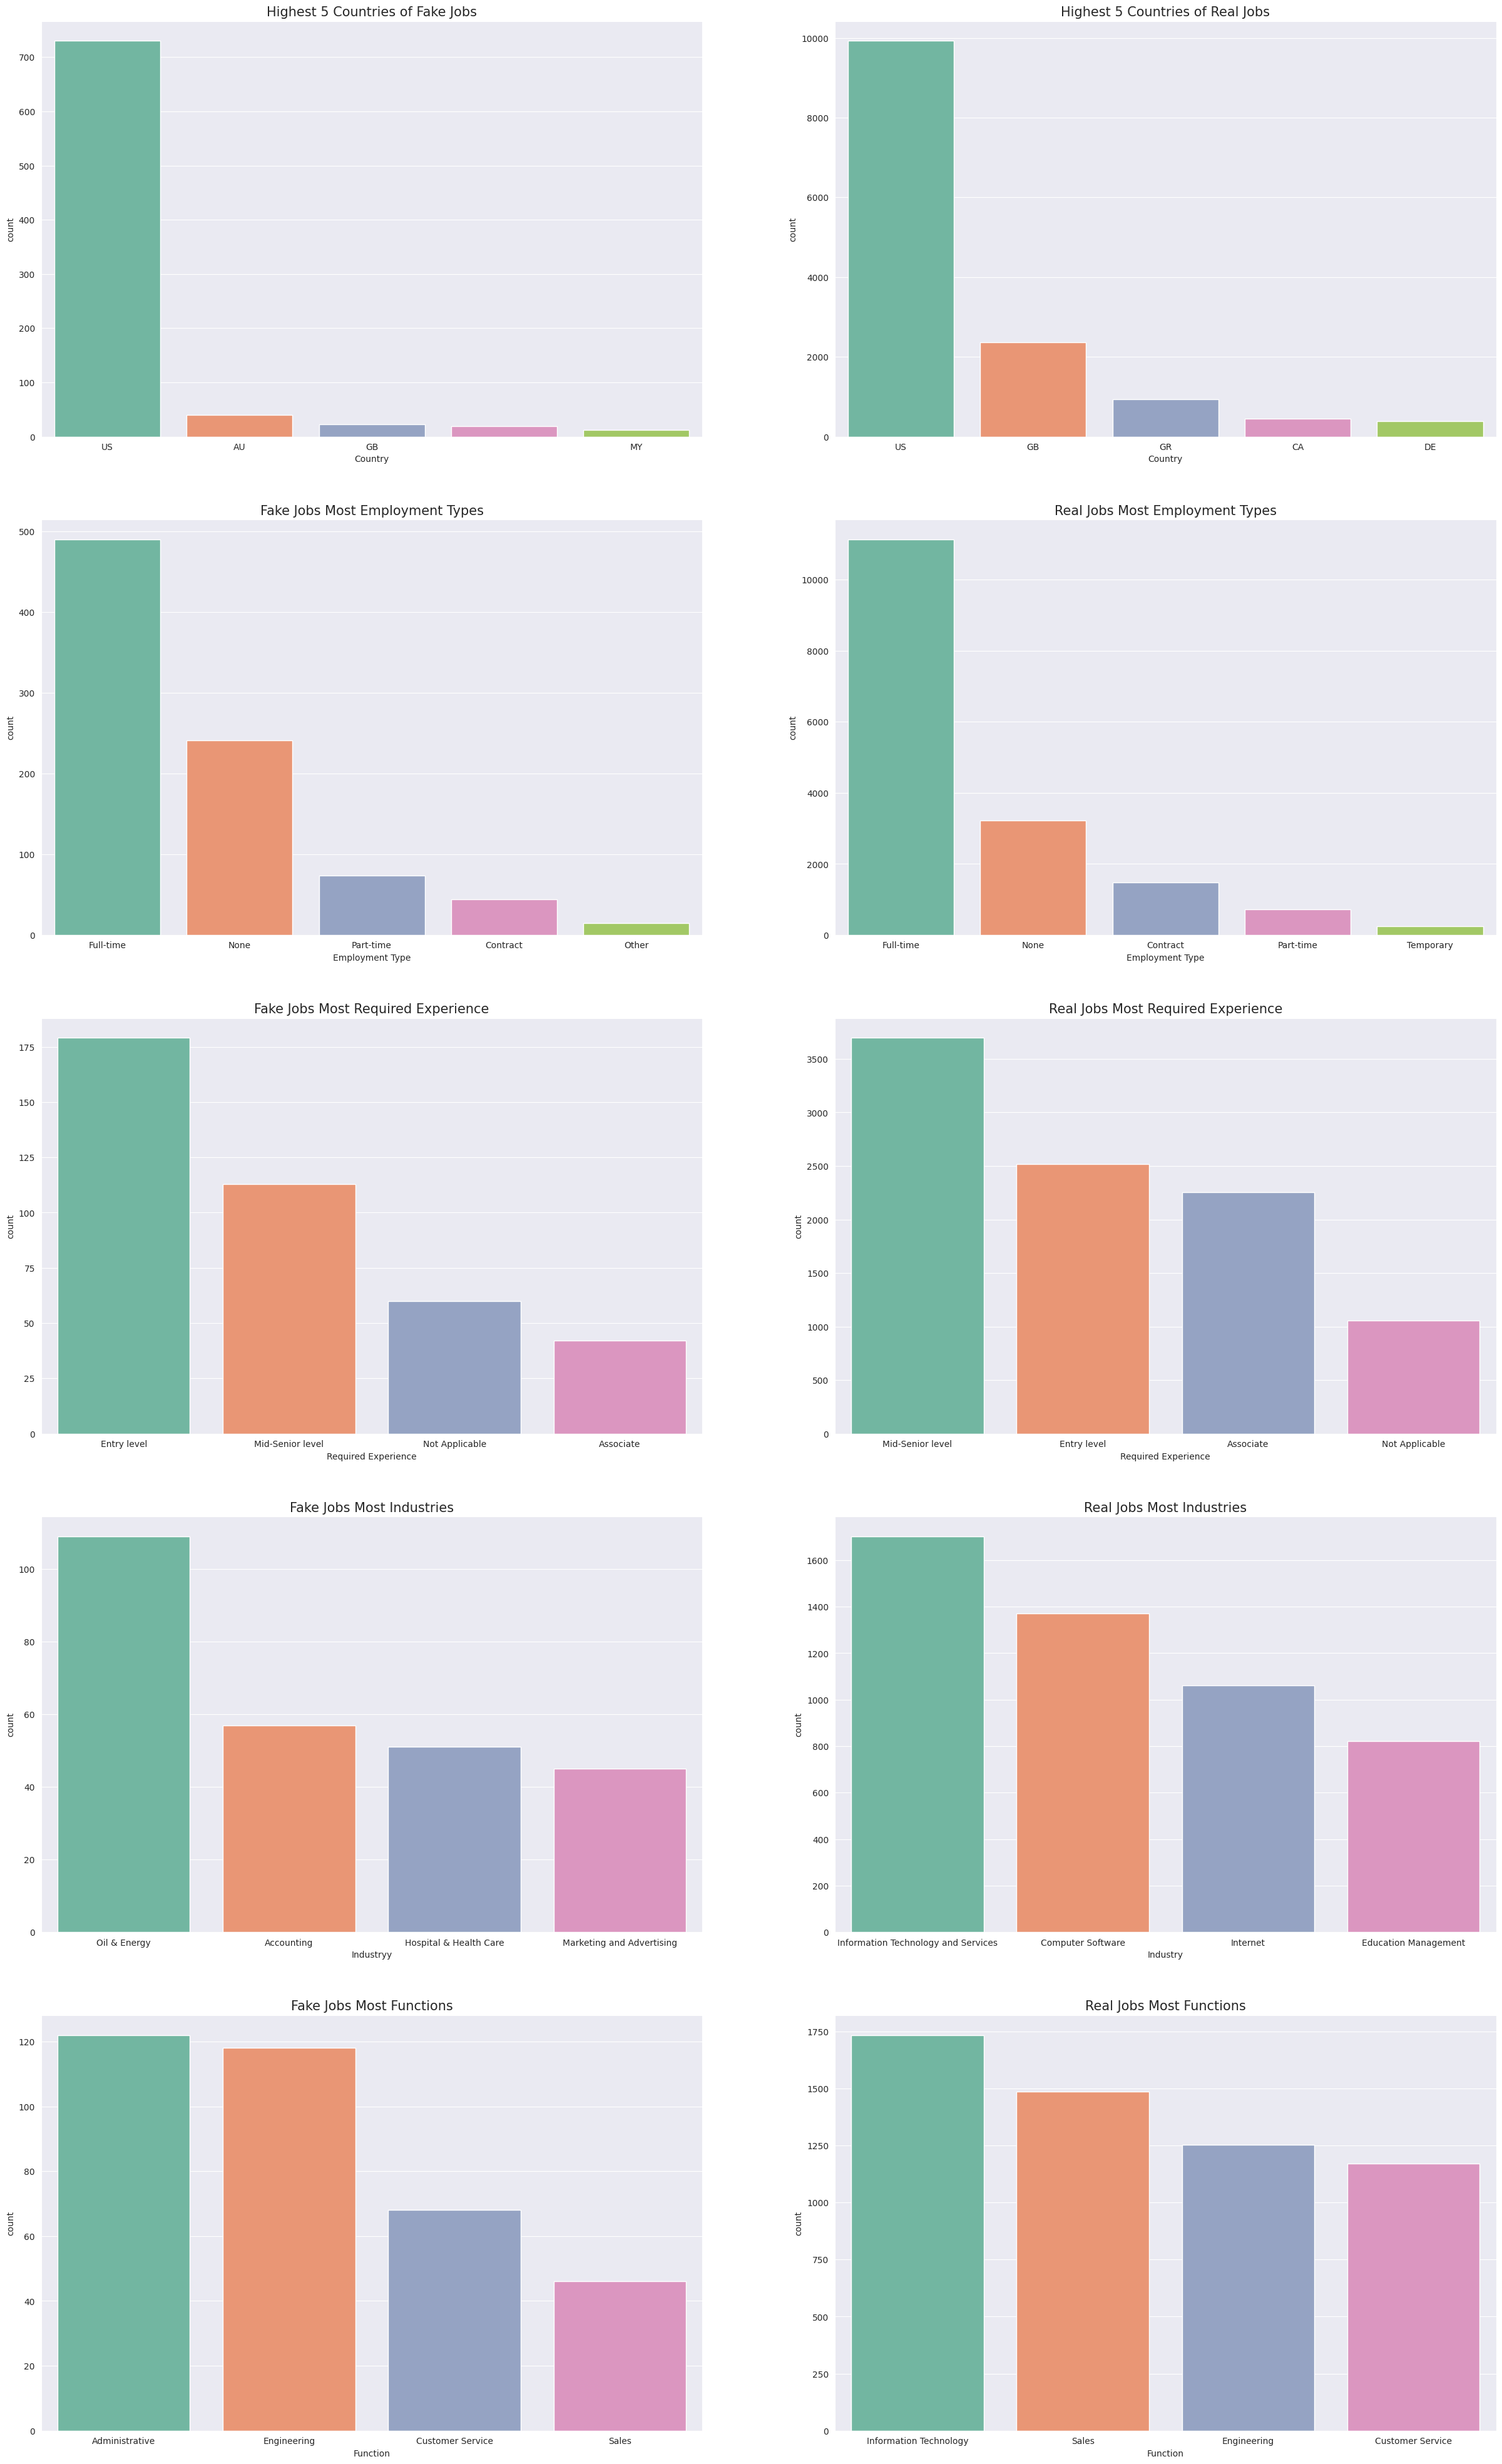

In [169]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(5,2,figsize=(30,50))
sns.countplot(data = fakejobs, x = 'country',palette='Set2',order = fakejobs['country'].value_counts()[:5].index,ax=axes[0,0])
sns.countplot(data = realjobs, x = 'country',palette='Set2',order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1])
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')

sns.countplot(data = fakejobs, x = 'employment_type',palette='Set2',order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0])
sns.countplot(data = realjobs, x = 'employment_type',palette='Set2',order = realjobs['employment_type'].value_counts()[:5].index,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')


sns.countplot(data = fakejobs, x = 'required_experience',palette='Set2',order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0])
sns.countplot(data = realjobs, x = 'required_experience',palette='Set2',order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

sns.countplot(data = fakejobs, x = 'industry',palette='Set2',order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0])
sns.countplot(data = realjobs, x = 'industry',palette='Set2',order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

sns.countplot(data = fakejobs, x = 'function',palette='Set2',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0])
sns.countplot(data = realjobs, x = 'function',palette='Set2',order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')

# AU --> Austrilia
# GB --> United Kingdom
# GR --> Greece
# CA --> Canada
# MY --> Malaysia

Text(0.5, 0, '')

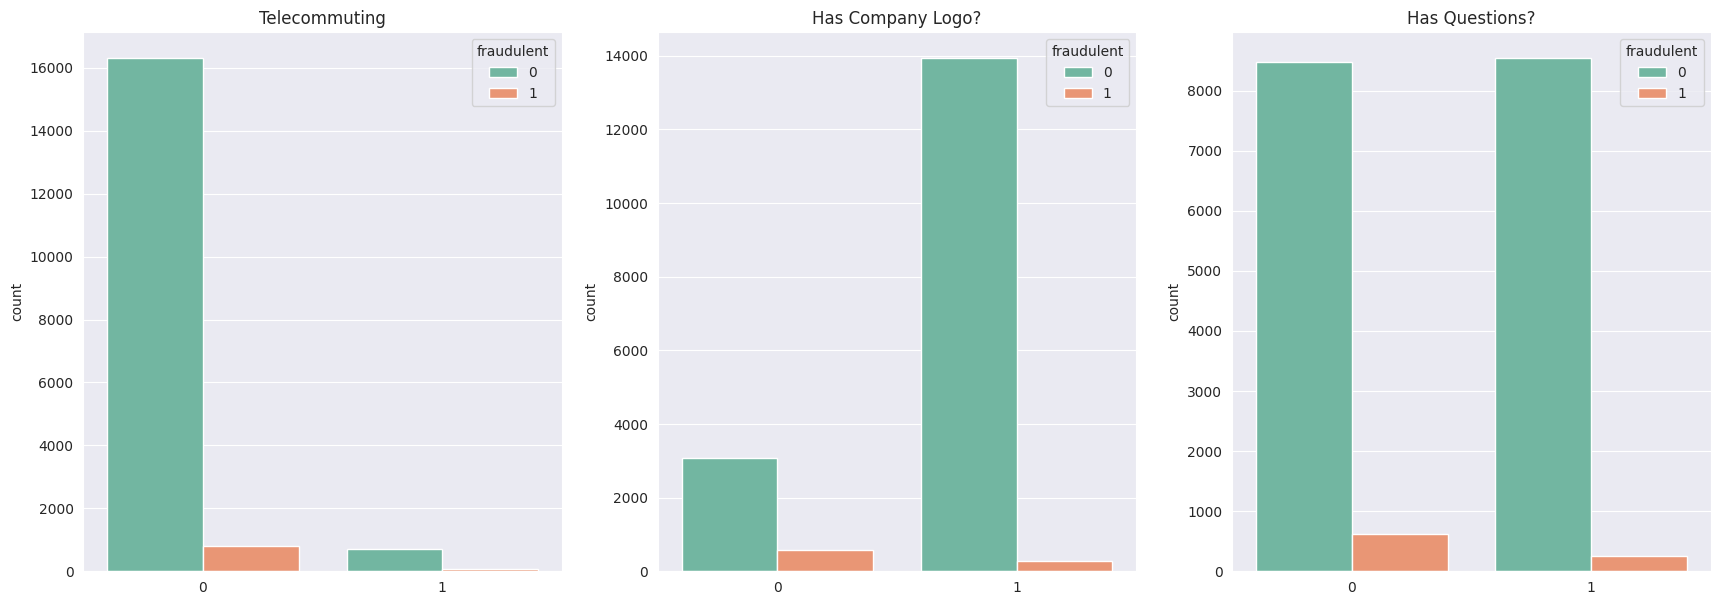

In [170]:
fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[0])
sns.countplot(x='has_company_logo', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[1])
sns.countplot(x='has_questions', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[2])

axes[0].set_title('Telecommuting',fontsize=12)
axes[1].set_title('Has Company Logo?',fontsize=12)
axes[2].set_title('Has Questions?',fontsize=12)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')


## Industries / Experience / Need

### - Топ 10 индустрий, в которых нужен опыт

In [171]:
exp_list=['Executive','Associate','Director','Mid-Senior level']
exp_data=categ_cols.loc[categ_cols['required_experience'].isin(exp_list)]
exp_data_indus=exp_data.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_indus.head(30)

required_experience
industry                required_experience                     
Accounting              Associate                             25
                        Mid-Senior level                      14
                        Director                               1
                        Executive                              1
Airlines/Aviation       Mid-Senior level                      23
                        Associate                             10
                        Executive                              3
                        Director                               1
Animation               Associate                              1
Apparel & Fashion       Mid-Senior level                      36
                        Associate                              9
                        Director                               6
Architecture & Planning Mid-Senior level                       3
                        Associate                              2
Automotive              Mid-Senior level                      32
                        Associate                             21
                        Director                               1
                        Executive                              1
Aviation & Aerospace    Mid-Senior level                       8
                        Associate                              5
                        Director                               5
Banking                 Associate                             32
                        Mid-Senior level                      29
                        Director                               2
                        Executive                              1
Biotechnology           Associate                             14
                        Mid-Senior level                      11
                        Director                               1
Broadcast Media         Mid-Senior level                      43
                        Associate                              4

### - Какие функции требуют опыт?

In [172]:
exp_data_fun=exp_data.groupby('function')['required_experience'].value_counts(ascending=False).to_frame()
exp_data_fun.head(30)

required_experience
function              required_experience                     
Account Management    Mid-Senior level                       1
Accounting/Auditing   Associate                             58
                      Mid-Senior level                      54
                      Director                               5
                      Executive                              3
Ad Sales              Director                               1
Administrative        Associate                            109
                      Mid-Senior level                      32
                      Executive                              6
                      Director                               3
Advertising           Mid-Senior level                      30
                      Associate                             17
                      Director                               4
All                   Mid-Senior level                       1
Apps                  Executive                              1
Art Studio            Associate                              1
Art/Creative          Mid-Senior level                      40
                      Associate                             23
                      Director                               5
Broadcasting          Associate                              1
Business              Mid-Senior level                       1
Business Analyst      Mid-Senior level                      26
                      Associate                             24
                      Director                               3
Business Development  Mid-Senior level                      59
                      Associate                             55
                      Director                              15
                      Executive                              6
Business Developmment Associate                              1
CSD Technology        Mid-Senior level                       1

### - Страны с видом занятости

In [173]:
categ_cols.groupby('country')['employment_type'].value_counts(ascending=False).to_frame().head(50)

employment_type
country employment_type                 
        None                         214
        Full-time                     96
        Part-time                     14
        Contract                      12
        Other                          8
        Temporary                      2
AE      Full-time                     34
        None                          20
AL      None                           1
AM      Full-time                      2
AR      None                           5
        Full-time                      4
AT      None                           7
        Full-time                      6
        Contract                       1
AU      Full-time                    136
        Part-time                     37
        None                          28
        Contract                       6
        Other                          4
        Temporary                      3
BD      Full-time                      2
BE      Full-time                    107
        None                           5
        Temporary                      3
        Other                          2
BG      Full-time                     17
BH      None                           9
BR      Full-time                     27
        None                           6
        Contract                       2
        Other                          1
BY      Full-time                      5
        None                           4
CA      Full-time                    300
        None                          78
        Contract                      43
        Part-time                     30
        Other                          4
        Temporary                      2
CH      Full-time                     13
        None                           1
        Other                          1
CL      None                           2
CM      Full-time                      1
CN      Full-time                     10
        Contract                       3
        None                           2
CO      None                           1
CY      None                           6

### - Индустрии и требуемое образование

In [174]:
categ_cols.groupby('industry')['required_education'].value_counts(ascending=False).to_frame().head(50)

required_education
industry                       required_education                                   
Accounting                     None                                               71
                               Bachelor's Degree                                  35
                               High School or equivalent                          29
                               Unspecified                                        15
                               Certification                                       4
                               Master's Degree                                     2
                               Professional                                        2
                               Some College Coursework Completed                   1
Airlines/Aviation              None                                               33
                               Bachelor's Degree                                  22
                               Unspecified                                         4
                               High School or equivalent                           3
                               Master's Degree                                     1
Alternative Dispute Resolution Vocational                                          1
Animation                      None                                                3
                               Certification                                       1
                               Unspecified                                         1
Apparel & Fashion              None                                               44
                               Bachelor's Degree                                  34
                               Unspecified                                         9
                               Associate Degree                                    5
                               High School or equivalent                           3
                               Master's Degree                                     1
                               Vocational                                          1
Architecture & Planning        Bachelor's Degree                                   6
                               None                                                4
Automotive                     High School or equivalent                          30
                               Bachelor's Degree                                  28
                               Unspecified                                        26
                               None                                               25
                               Associate Degree                                    8
                               Master's Degree                                     1
                               Some College Coursework Completed                   1
                               Vocational                                          1
Aviation & Aerospace           Bachelor's Degree                                  10
                               None                                                6
                               Master's Degree                                     5
                               Professional                                        2
                               Unspecified                                         1
Banking                        High School or equivalent                          33
                               Bachelor's Degree                                  21
                               None                                               13
                               Unspecified                                         6
                               Master's Degree                                     5
                               Professional                                        3
                               Associate Degree                        

- # Текстовые данные

## Исследуем текст

In [175]:
# тк мы использовали Country в колонке местоположения как категориальные данные
cols_to_remove=['location']
txt_cols.drop(columns=cols_to_remove,inplace=True)

#### Исследуем текст и удаляем стоп-слова и стемминг

In [176]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [177]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)


In [178]:
# Разделяем текстовые данные на ненастоящие и настоящие
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

- #### Применяем очистку на Заголовках

In [179]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)

In [180]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [181]:
fraud_titles

98                      ice technician
144                        forward cap
173      technician instrument control
180                        sale execut
215             ice technician mt poso
                     ...              
17827    student posit parttim fulltim
17828                      sale associ
17829                  android develop
17830                     payrol clerk
17831                   furnitur mover
Name: title, Length: 866, dtype: object

In [182]:
# To List

fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()

In [183]:
# Corpus for WordCloud
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

#### Самые частые заголовки для ненастоящих и настоящих вакансий

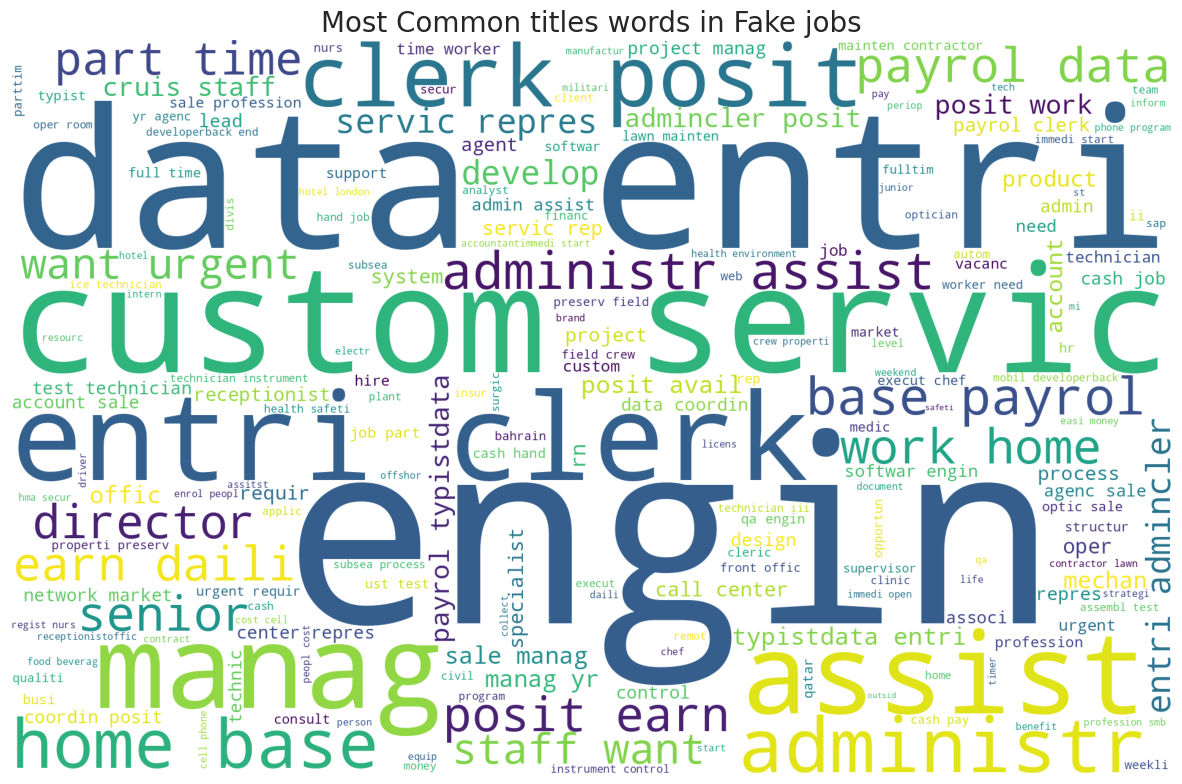

In [184]:
plt.figure(figsize=(15,10))
wordcloudfraud=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)

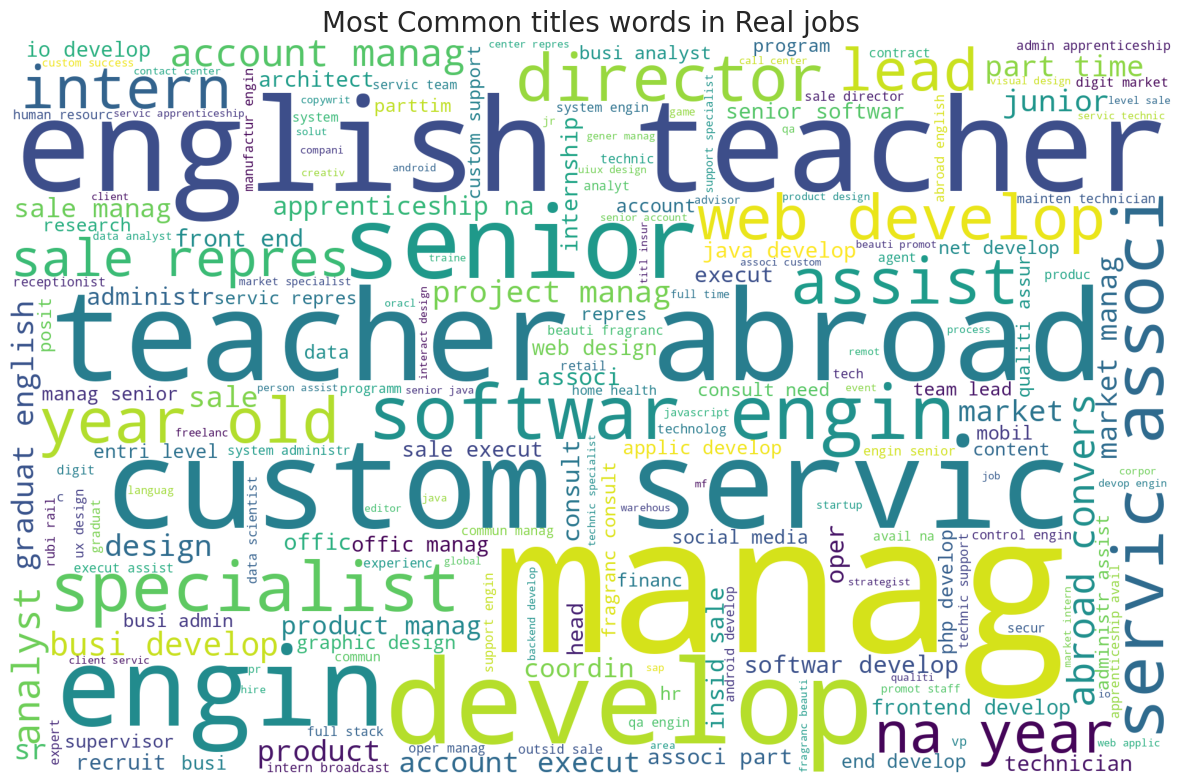

In [185]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)

Text(0.5, 1.0, 'Real Titles Lengths')

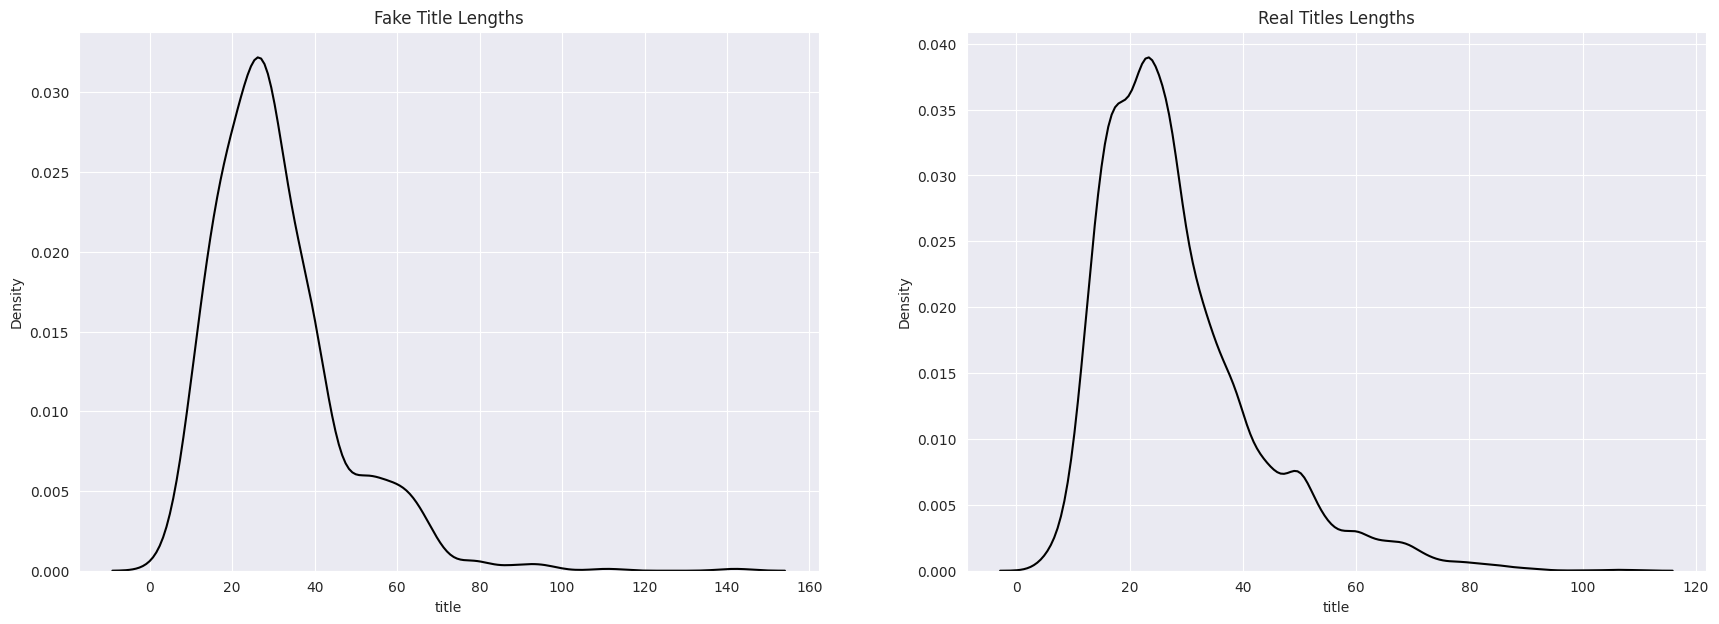

In [186]:
fraud_title_length=txt_cols[txt_cols["fraudulent"]==1]['title'].str.len()
not_fraud_title_length=txt_cols[txt_cols["fraudulent"]==0]['title'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_title_length,ax=axes[0],color='black')
sns.kdeplot(not_fraud_title_length,ax=axes[1],color='black')

axes[0].set_title('Fake Title Lengths',fontsize=12)
axes[1].set_title('Real Titles Lengths',fontsize=12)

In [187]:
txt_fraud['company_profile']=txt_fraud['company_profile'].apply(column_clean)
txt_not_fraud['company_profile']=txt_not_fraud['company_profile'].apply(column_clean)

In [188]:
fraud_company = txt_fraud['company_profile'].apply(combine)
not_fraud_company = txt_not_fraud['company_profile'].apply(combine)

In [189]:
# To List

fraud_company_corpus=fraud_company.values.tolist()
not_fraud_company_corpus=not_fraud_company.values.tolist()

In [190]:
# Corpus for WordCloud
fraud_company_corpus=' '.join(fraud_company_corpus)
not_fraud_company_corpus=' '.join(not_fraud_company_corpus)

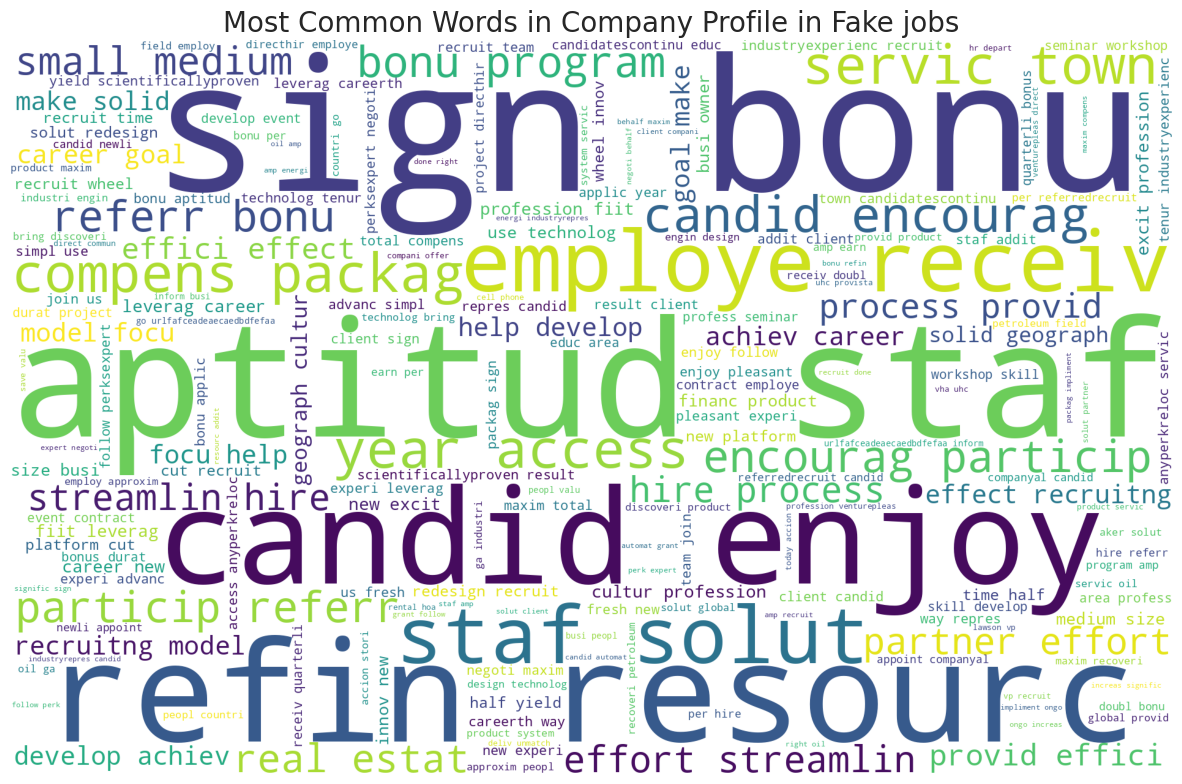

In [191]:
plt.figure(figsize=(15,10))
wordcloud_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_company)

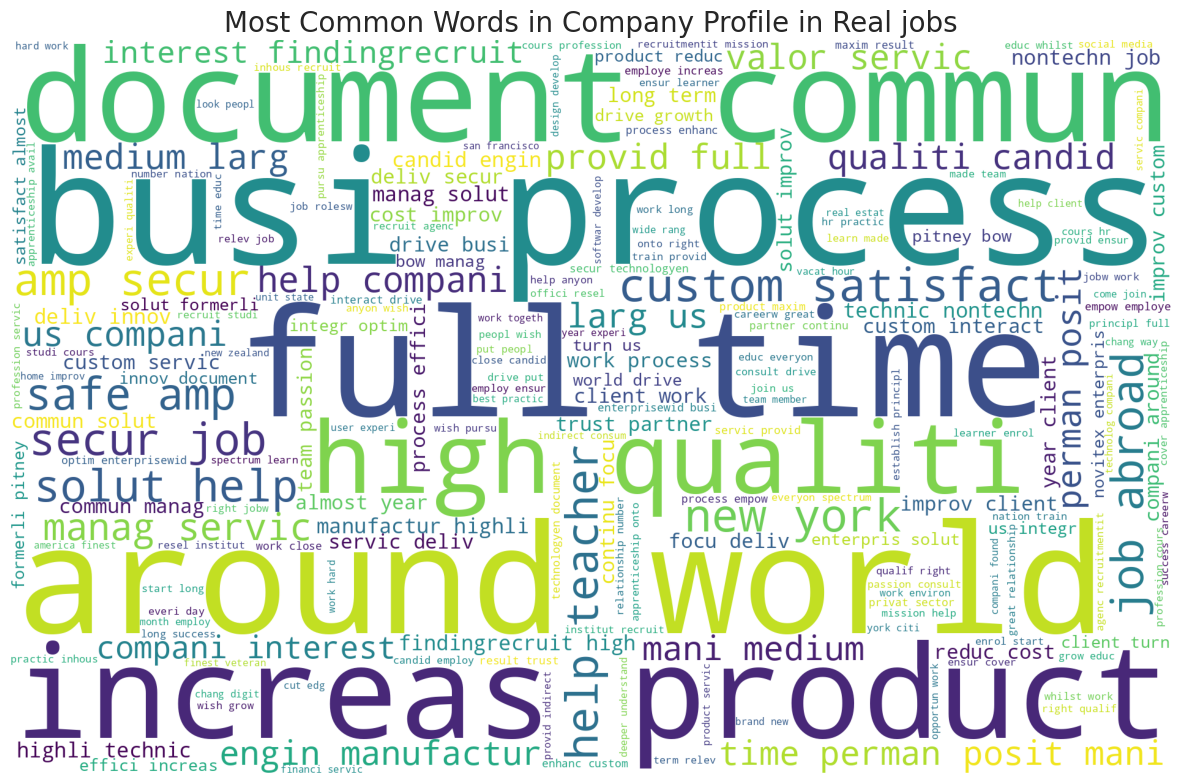

In [192]:
plt.figure(figsize=(15,10))
wordcloud_not_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Real jobs',size=20)
plt.imshow(wordcloud_not_fraud_company)

Text(0.5, 1.0, 'Real Company Profile Lengths')

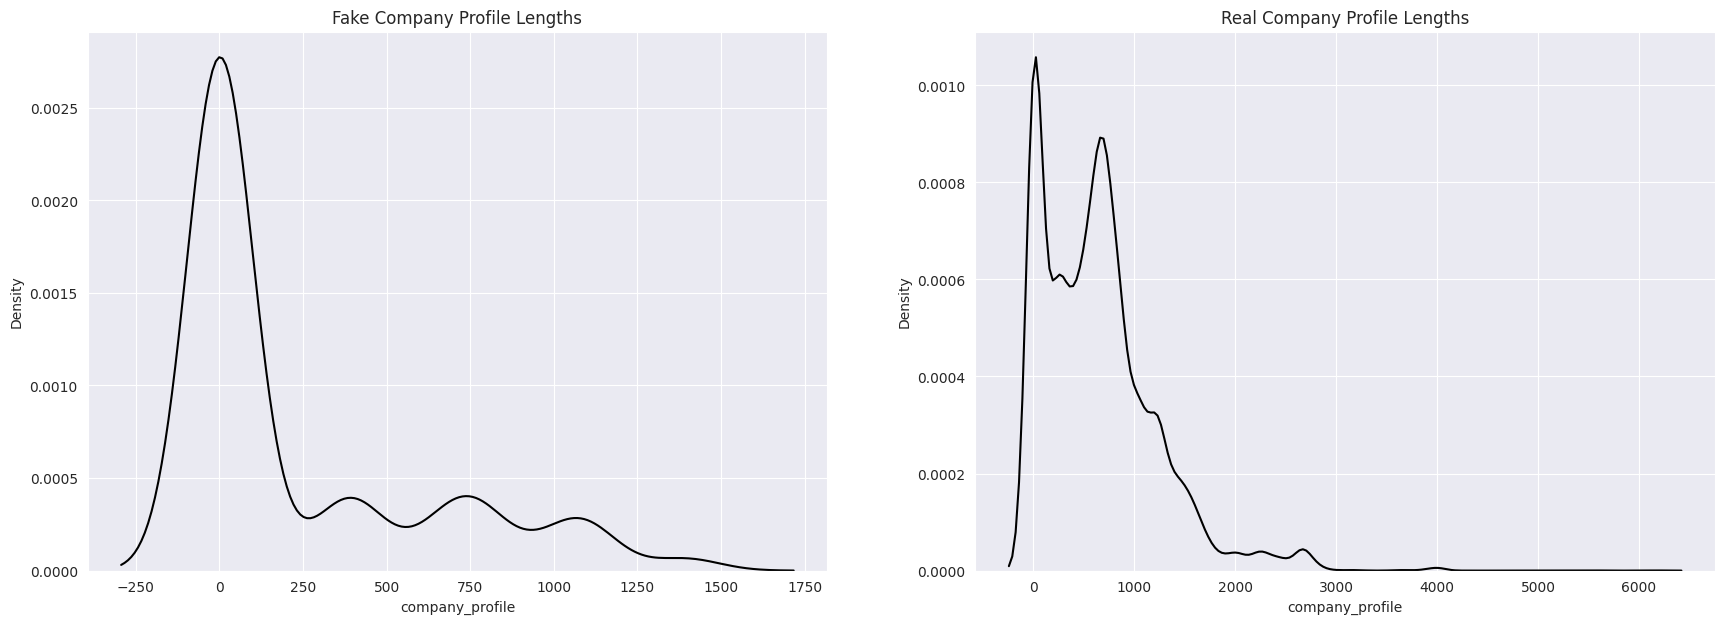

In [193]:
#распределение длин профилей для мошенников и нет
fraud_company_length=txt_cols[txt_cols["fraudulent"]==1]['company_profile'].str.len()
not_fraud_company_length=txt_cols[txt_cols["fraudulent"]==0]['company_profile'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sns.kdeplot(fraud_company_length,ax=axes[0],color='black')
sns.kdeplot(not_fraud_company_length,ax=axes[1],color='black')

axes[0].set_title('Fake Company Profile Lengths',fontsize=12)
axes[1].set_title('Real Company Profile Lengths',fontsize=12)

In [194]:
txt_fraud['requirements']=txt_fraud['requirements'].apply(column_clean)
txt_not_fraud['requirements']=txt_not_fraud['requirements'].apply(column_clean)

In [195]:
fraud_requirements = txt_fraud['requirements'].apply(combine)
not_fraud_requirements = txt_not_fraud['requirements'].apply(combine)

In [196]:
# To List

fraud_requirements_corpus=fraud_requirements.values.tolist()
not_fraud_requirements_corpus=not_fraud_requirements.values.tolist()

In [197]:
# Corpus for WordCloud
fraud_requirements_corpus=' '.join(fraud_requirements_corpus)
not_fraud_requirements_corpus=' '.join(not_fraud_requirements_corpus)

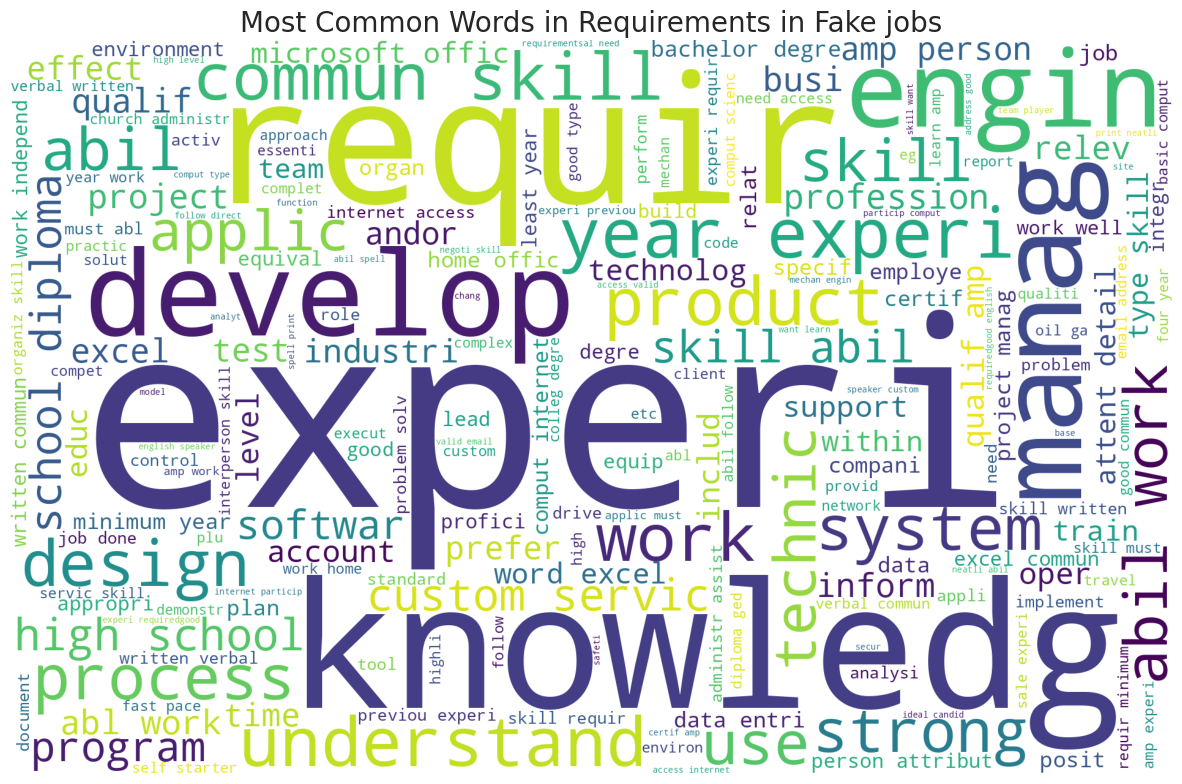

In [198]:
plt.figure(figsize=(15,10))
wordcloud_fraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_requirements)

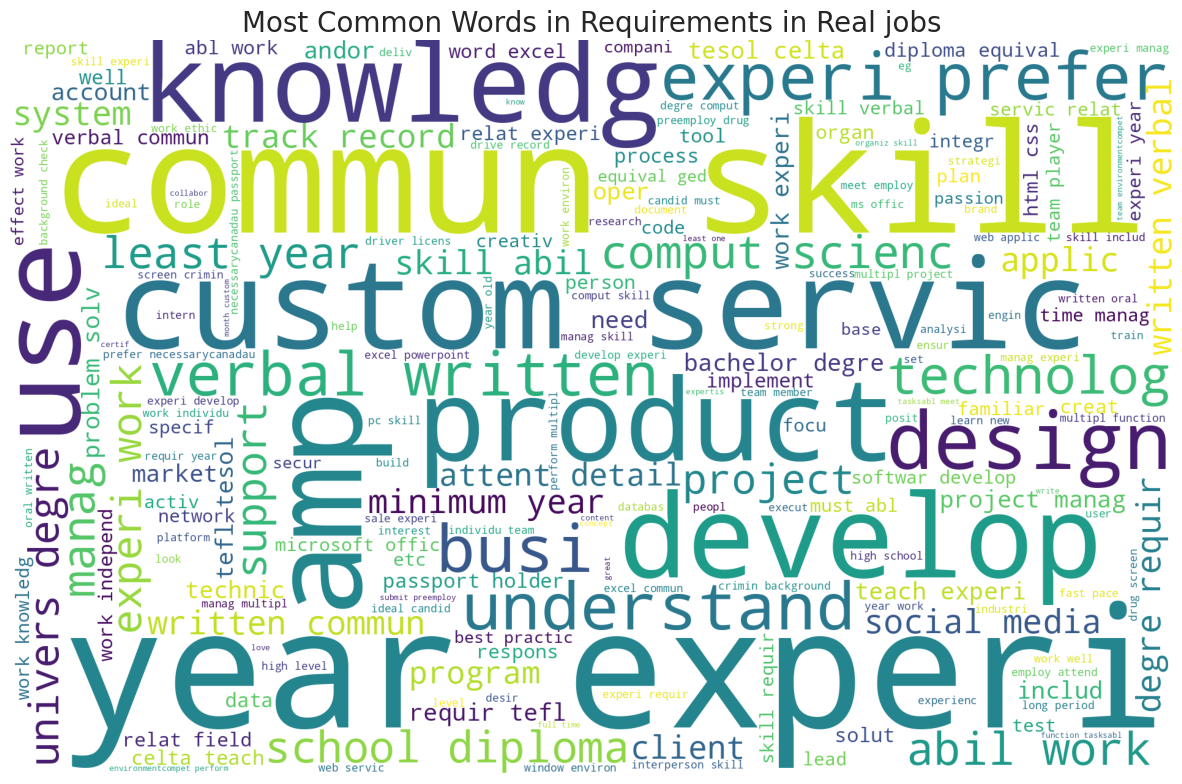

In [199]:
plt.figure(figsize=(15,10))
wordcloud_notfraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Real jobs',size=20)
plt.imshow(wordcloud_notfraud_requirements)

In [200]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [201]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)

In [202]:
data['text']=data['text'].apply(column_clean)

In [203]:
data['text']=data['text'].apply(combine)

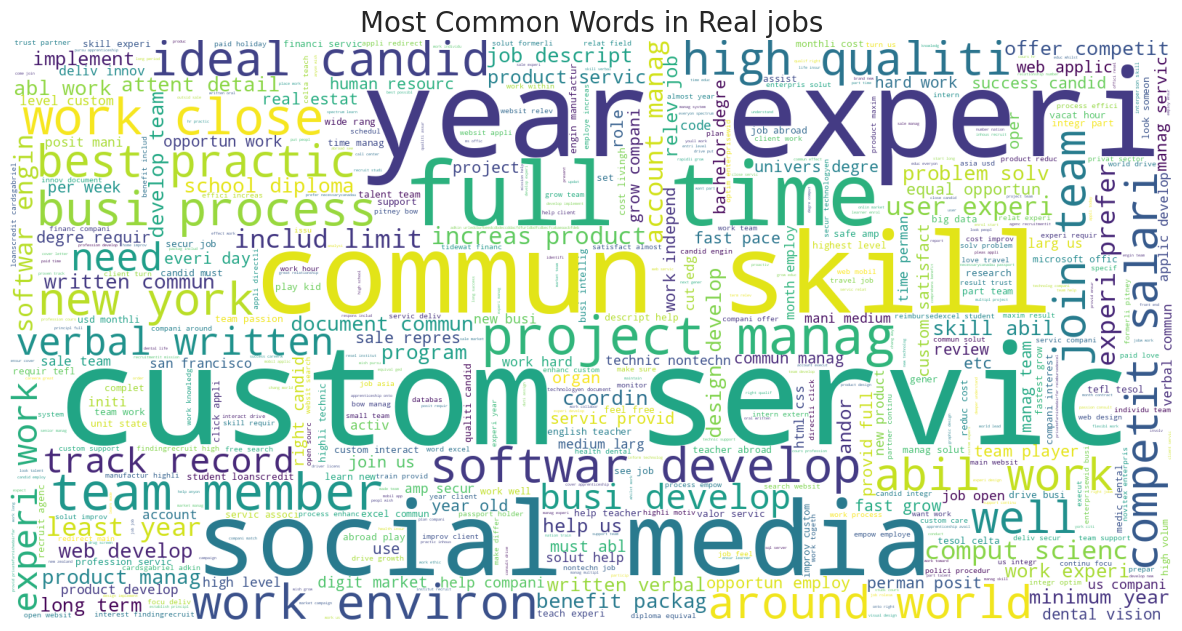

In [204]:
plt.figure(figsize = (15,10))
wordcloud_real = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 0]['text']))
plt.axis('off')
plt.title('Most Common Words in Real jobs',size=20)
plt.imshow(wordcloud_real)

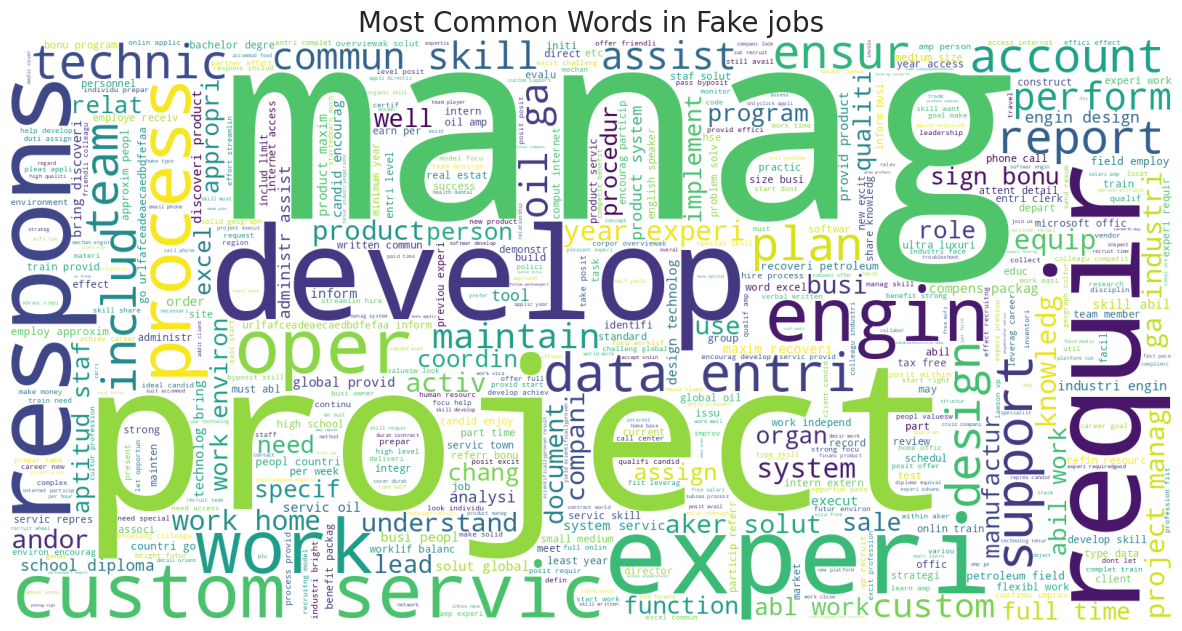

In [205]:
plt.figure(figsize = (15,10))
wordcloud_fake = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 1]['text']))
plt.axis('off')
plt.title('Most Common Words in Fake jobs',size=20)
plt.imshow(wordcloud_fake)

In [206]:
x=data.drop(columns='fraudulent')
y=data['fraudulent']

In [207]:
# Делаем матрица подсчета
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])

In [208]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [209]:
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

In [210]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

In [211]:
text

aan  ab  abap  abc  abil  abl  abreast  abroad  absenc  absolut  ...  \
0        0   0     0    0     0    0        0       0       0        0  ...   
1        0   0     0    0     0    1        0       0       0        0  ...   
2        0   0     0    0     0    0        0       0       0        0  ...   
3        0   0     0    0     1    0        0       0       0        0  ...   
4        0   0     0    0     0    1        0       0       0        0  ...   
...    ...  ..   ...  ...   ...  ...      ...     ...     ...      ...  ...   
17875    0   0     0    0     1    0        0       0       0        1  ...   
17876    0   0     0    0     2    1        0       0       0        0  ...   
17877    0   0     0    0     0    1        0       0       0        0  ...   
17878    0   0     0    0     0    2        0       0       0        0  ...   
17879    0   0     0    0     0    0        0       0       0        0  ...   

       zend  zendesk  zero  zijn  zingchart  zodat  zone  zopa  zpompano  \
0         0        0     0     0          0      0     0     0         0   
1         0        0     0     0          0      0     0     0         0   
2         0        0     0     0          0      0     0     0         0   
3         0        0     2     0          0      0     0     0         0   
4         0        0     0     0          0      0     0     0         1   
...     ...      ...   ...   ...        ...    ...   ...   ...       ...   
17875     0        0     0     0          0      0     0     0         0   
17876     0        0     0     0          0      0     0     0         0   
17877     0        0     0     0          0      0     0     0         0   
17878     0        0     0     0          0      0     0     0         0   
17879     0        0     0     0          0      0     1     0         0   

       zylun  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
17875      0  
17876      0  
17877      0  
17878      0  
17879      0  

[17880 rows x 5000 columns]

In [ ]:
x_train

# Построение моделей

## kNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [125]:
y_test_predict = knn.predict(x_test)
err_test  = np.mean(y_test  != y_test_predict)

In [126]:
err_test = 1 - knn.score(x_test, y_test) # Другой способ

In [127]:
err_test

0.043344519015659944

In [128]:
# Ищем лучший кол-во соседей
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.03621380715720357 20


In [129]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(x_train, y_train)

err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test  != knn.predict(x_test))

print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.029921700223713647
Ошибка на тестировочной выборке 0.03355704697986577


In [130]:
knn_y_pred=knn.predict(x_test)

        Training Classification report for KNN 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     13611
           1       0.77      0.55      0.64       693

    accuracy                           0.97     14304
   macro avg       0.87      0.77      0.81     14304
weighted avg       0.97      0.97      0.97     14304

        Testing Classification Report for KNN 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3403
           1       0.72      0.50      0.59       173

    accuracy                           0.97      3576
   macro avg       0.85      0.75      0.79      3576
weighted avg       0.96      0.97      0.96      3576

        Confusion Matrix for Training KNN 
        Confusion Matrix for Testing KNN 


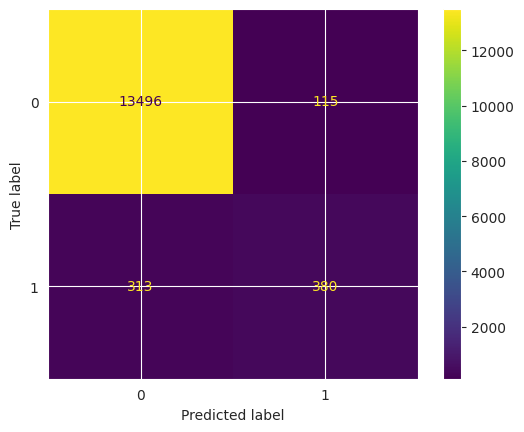

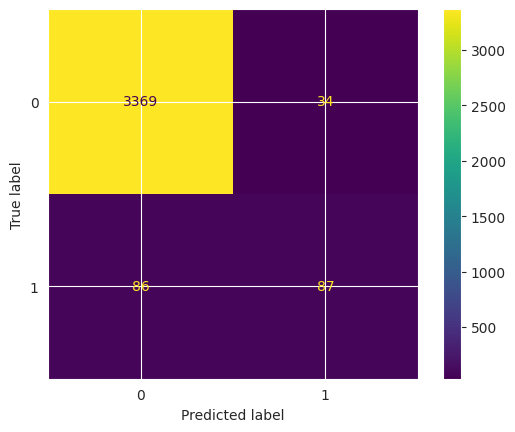

In [131]:
print('        Training Classification report for KNN \n',classification_report(y_train,knn.predict(x_train)))
print('        Testing Classification Report for KNN \n',classification_report(y_test,knn_y_pred))

print('        Confusion Matrix for Training KNN \n',ConfusionMatrixDisplay.from_estimator(knn,x_train,y_train))
print('        Confusion Matrix for Testing KNN \n',ConfusionMatrixDisplay.from_estimator(knn,x_test,y_test))


## Decision Tree

In [132]:
# DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred=dt.predict(x_test)

err_test  = np.mean(y_test  != dt_y_pred)
err_train  = np.mean(y_train != dt.predict(x_train))
print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.0
Ошибка на тестировочной выборке 0.02348993288590604


        Training Classification report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.77      0.74      0.75       173

    accuracy                           0.98      3576
   macro avg       0.88      0.86      0.87      3576
weighted avg       0.98      0.98      0.98      3576

        Confusion Matrix for Training Decision Tree Classifier 
        Confusion Matrix for Testing Decision Tree Classifier


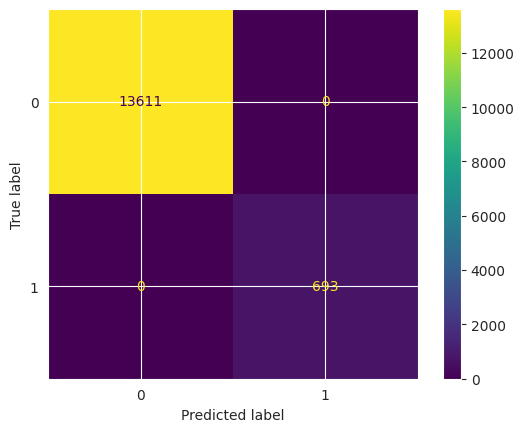

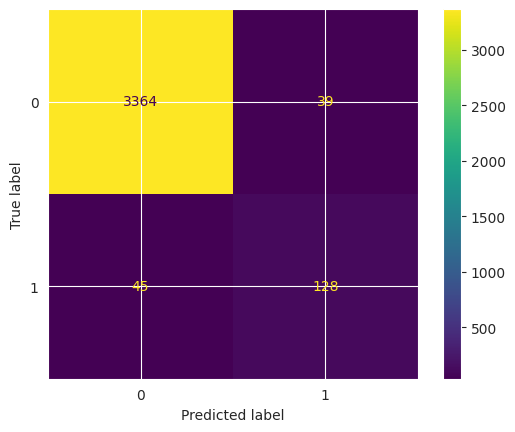

In [133]:
print('        Training Classification report for Decision Tree Classifier \n',classification_report(y_train,dt.predict(x_train)))
print('        Testing Classification Report for Decision Tree Classifier \n',classification_report(y_test,dt_y_pred))
print('        Confusion Matrix for Training Decision Tree Classifier \n',ConfusionMatrixDisplay.from_estimator(dt,x_train,y_train))
print('        Confusion Matrix for Testing Decision Tree Classifier\n',ConfusionMatrixDisplay.from_estimator(dt,x_test,y_test))


## AdaBoost

In [134]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_y_pred=ada.predict(x_test)

err_test  = np.mean(y_test  != ada_y_pred)
err_train  = np.mean(y_train != ada.predict(x_train))
print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.028034116331096197
Ошибка на тестировочной выборке 0.026845637583892617


        Training Classification report for AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     13611
           1       0.80      0.56      0.66       693

    accuracy                           0.97     14304
   macro avg       0.89      0.78      0.82     14304
weighted avg       0.97      0.97      0.97     14304

        Testing Classification Report for AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.82      0.57      0.67       173

    accuracy                           0.97      3576
   macro avg       0.90      0.78      0.83      3576
weighted avg       0.97      0.97      0.97      3576

        Confusion Matrix for Training AdaBoost Classifier 
        Confusion Matrix for Testing AdaBoost Classifier


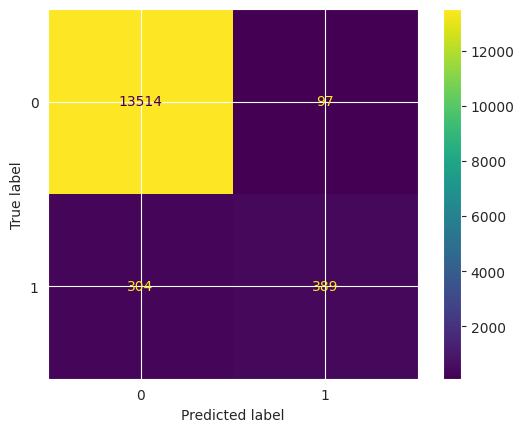

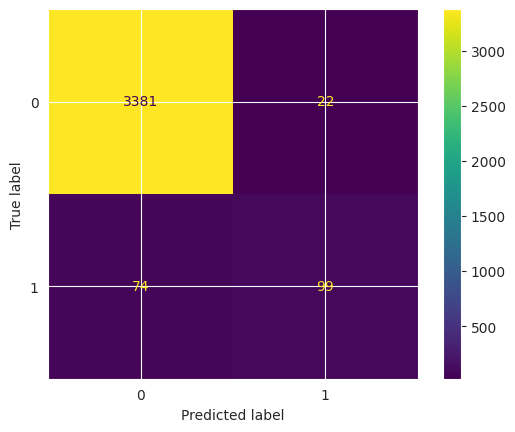

In [135]:
print('        Training Classification report for AdaBoost Classifier \n',classification_report(y_train,ada.predict(x_train)))
print('        Testing Classification Report for AdaBoost Classifier \n',classification_report(y_test,ada_y_pred))


print('        Confusion Matrix for Training AdaBoost Classifier \n',ConfusionMatrixDisplay.from_estimator(ada,x_train,y_train))
print('        Confusion Matrix for Testing AdaBoost Classifier\n',ConfusionMatrixDisplay.from_estimator(ada,x_test,y_test))


# Результаты

- kNN  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.73       | 0.52   | 0.61 |  

Время: 1m 4s  
Ошибка на тренировочной выборке 0.02978187919463087  
Ошибка на тестировочной выборке 0.03271812080536913  
  
- DT  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.82       | 0.77   | 0.79 |  

Время: 32s  
Ошибка на тренировочной выборке 0.0  
Ошибка на тестировочной выборке 0.021532438478747203  
  
- Ada  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.82       | 0.57   | 0.67 |  

Время: 1m 14s  
Ошибка на тренировочной выборке 0.028034116331096197  
Ошибка на тестировочной выборке 0.026845637583892617  
  
Лучше всех и быстрее справился алгоритм Decision Tree. kNN с подбором параметра не смог достичь такой точности.

## Логистическая регрессия

In [136]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

err_test  = np.mean(y_test  != lr_y_pred)
err_train  = np.mean(y_train != lr.predict(x_train))
print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.00034955257270693514
Ошибка на тестировочной выборке 0.013982102908277404


        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.90      0.80      0.85       173

    accuracy                           0.99      3576
   macro avg       0.95      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576

        Confusion Matrix for Training Logistic Regression 
        Confusion Matrix for Testing Logistic Regression 


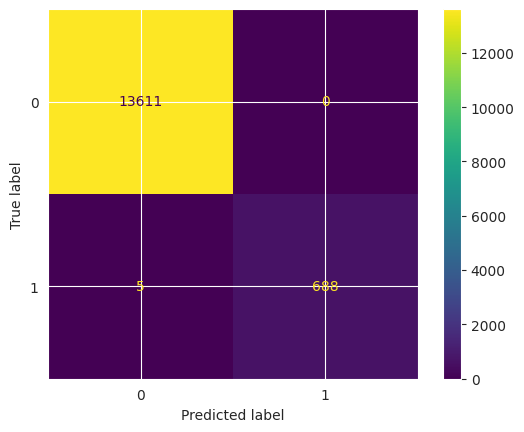

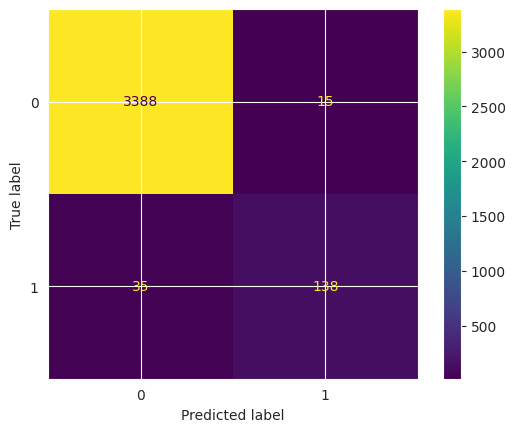

In [137]:
print('        Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('        Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))

print('        Confusion Matrix for Training Logistic Regression \n',ConfusionMatrixDisplay.from_estimator(lr,x_train,y_train))
print('        Confusion Matrix for Testing Logistic Regression \n',ConfusionMatrixDisplay.from_estimator(lr,x_test,y_test))


## Random Forest

In [138]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)

err_test  = np.mean(y_test  != rf_y_pred)
err_train  = np.mean(y_train != rf.predict(x_train))
print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

Ошибка на тренировочной выборке 0.0
Ошибка на тестировочной выборке 0.018456375838926176


        Training Classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.62      0.76       173

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576

        Confusion Matrix for Training Random Forest Classifier 
        Confusion Matrix for Testing Random Foresr Classifier


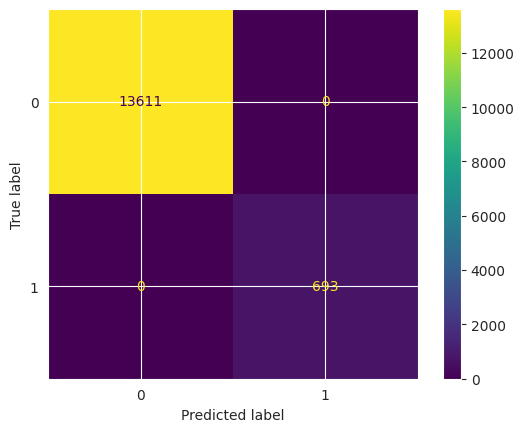

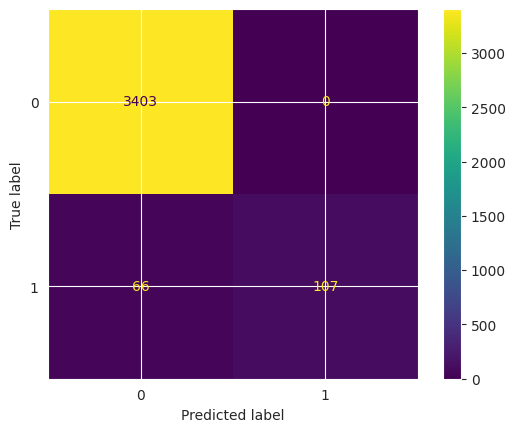

In [139]:
print('        Training Classification report for Random Forest Classifier \n',classification_report(y_train,rf.predict(x_train)))
print('        Testing Classification Report for Random Forest Classifier \n',classification_report(y_test,rf_y_pred))


print('        Confusion Matrix for Training Random Forest Classifier \n',ConfusionMatrixDisplay.from_estimator(rf,x_train,y_train))
print('        Confusion Matrix for Testing Random Foresr Classifier\n',ConfusionMatrixDisplay.from_estimator(rf,x_test,y_test))


# Полносвязная неглубокая нейронная сеть

Ошибка на тренировочной выборке 0.0
Ошибка на тестировочной выборке 0.013143176733780761
        Training Classification report for MLP 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for MLP 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.92      0.80      0.85       173

    accuracy                           0.99      3576
   macro avg       0.95      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576

        Confusion Matrix for Training MLP 
        Confusion Matrix for Testing MLP 


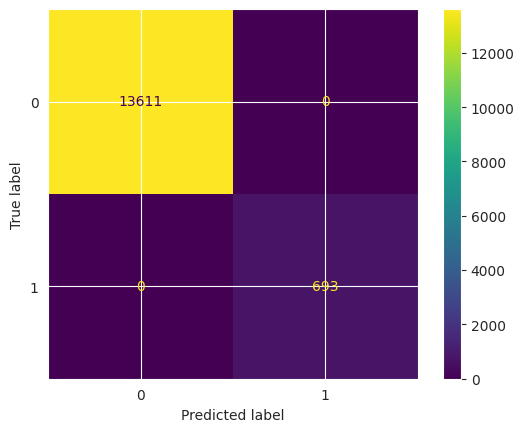

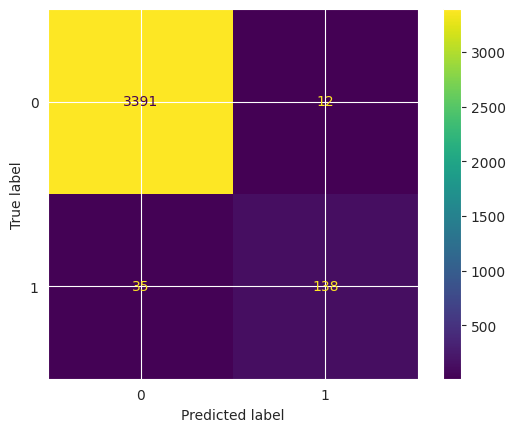

In [140]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (20,),
                          solver = 'adam',
                          activation = 'logistic',
                          random_state = 7, max_iter=100)

mlp_model.fit(x_train, y_train)

y_test_predict = mlp_model.predict(x_test)
y_train_predict = mlp_model.predict(x_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

print('        Training Classification report for MLP \n',classification_report(y_train,y_train_predict))
print('        Testing Classification Report for MLP \n',classification_report(y_test,y_test_predict))

print('        Confusion Matrix for Training MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,x_train,y_train))
print('        Confusion Matrix for Testing MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,x_test,y_test))

In [141]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,),
                              solver = 'adam', activation = 'logistic', max_iter=100, random_state = 7)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

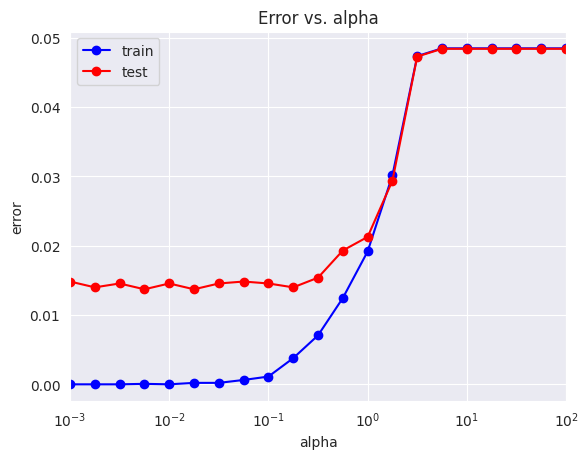

In [142]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

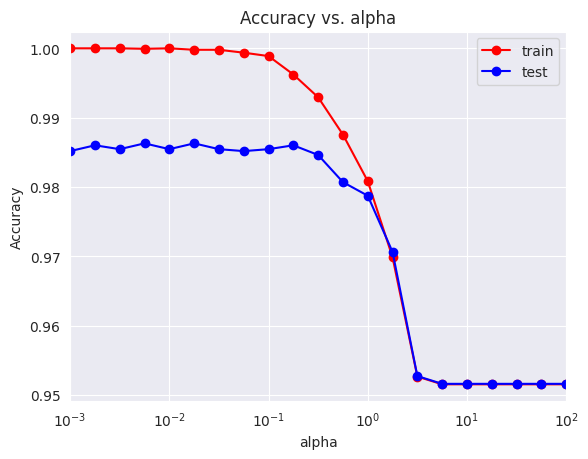

In [143]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [144]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"{min_train_err=}\n{min_test_err=}")

min_train_err=0.0
min_test_err=0.013702460850111857


In [145]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(f"{alpha_opt=}")

alpha_opt=array([0.00562341, 0.01778279])


## Полносвязная неглубокая нейронная сеть с оптимальный alpha

Ошибка на тренировочной выборке 6.991051454138702e-05
Ошибка на тестировочной выборке 0.014261744966442953
        Training Classification report for MLP 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for MLP 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.89      0.80      0.84       173

    accuracy                           0.99      3576
   macro avg       0.94      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576

        Confusion Matrix for Training MLP 
        Confusion Matrix for Testing MLP 


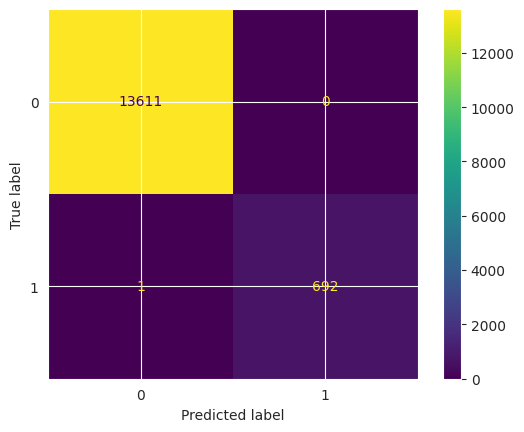

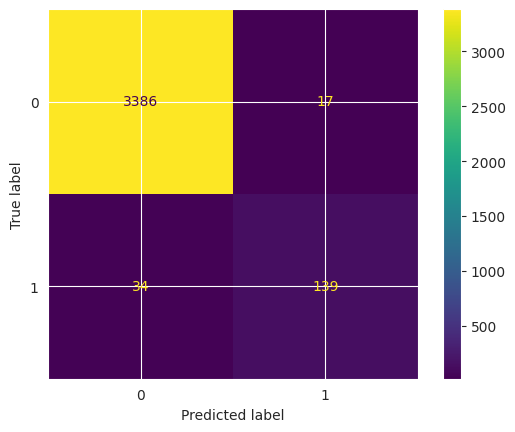

In [152]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (20,),
                          solver = 'adam', activation = 'logistic', random_state = 7, max_iter=500)
mlp_model.fit(x_train, y_train)

y_test_predict = mlp_model.predict(x_test)
y_train_predict = mlp_model.predict(x_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print('Ошибка на тренировочной выборке', err_train)
print('Ошибка на тестировочной выборке', err_test)

print('        Training Classification report for MLP \n',classification_report(y_train,y_train_predict))
print('        Testing Classification Report for MLP \n',classification_report(y_test,y_test_predict))

print('        Confusion Matrix for Training MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,x_train,y_train))
print('        Confusion Matrix for Testing MLP \n',ConfusionMatrixDisplay.from_estimator(mlp_model,x_test,y_test))

# Результаты

- Логистическая регрессия  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.90       | 0.80   | 0.85 |  

Время: 14s  
Ошибка на тренировочной выборке 0.00034955257270693514  
Ошибка на тестировочной выборке 0.013982102908277404
  
- Random Forest  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 1.00       | 0.60   | 0.75 |  

Время: 24s  
Ошибка на тренировочной выборке 0.0  
Ошибка на тестировочной выборке 0.019574944071588368  
  
- MLP  

| Precision  | Recall | F1   |  
|------------|--------|------|  
| 0.88       | 0.82   | 0.85 |  

Время: 4m 44s  
Ошибка на тренировочной выборке 6.991051454138702e-05  
Ошибка на тестировочной выборке 0.013982102908277404  
  
Лучше всех и быстрее справился алгоритм Логистической регрессии. Этого следовало ожидать, так как алгоритмы, работаютщие на деревьях, плохо справляются, когда имеется большое количество разрозненных признаков. Логистическая регрессия напротив хорошо справляется с такими случаями. Нейросесть смогла достичь такой же точности, но с учетом гораздо большего затраченного времени.